In [1]:
#import required libraries
import os
import pandas as pd
from tqdm.notebook import tqdm
import datetime
import matplotlib.pyplot as plt

In [2]:
#laod the database
db = '/home/giulio/Repositories/ukrainenewsscraper/Raw/Open/open.csv'
df = pd.read_csv(db)
df.head()

,ID,Title,url,Date
0,news-946055,Cosa è successo al deposito di petrolio di Bel...,https://www.open.online/2022/04/02/russia-belg...,2022-04-02 10:42:00
1,news-946061,Hostomel: la distruzione dell’aeroporto Antono...,https://www.open.online/2022/04/02/guerra-russ...,2022-04-02 10:06:00
2,news-946043,Il filmato della Bbc che prova il massacro dei...,https://www.open.online/2022/04/02/guerra-russ...,2022-04-02 09:35:00
3,news-945961,I russi hanno inviato 5.000 messaggi per incit...,https://www.open.online/2022/04/02/ucraina-mes...,2022-04-02 07:47:00
4,news-945973,Starstreak: il missile antiaereo Uk che abbatt...,https://www.open.online/2022/04/02/guerra-russ...,2022-04-02 07:33:00


In [3]:
#time period to study
firstDay = '2022-01-01'
lastDay = '2022-04-03'

In [4]:
#keywords to test. please use lowercase only
keywords = ['bambino','bambina','bambini']

In [5]:
df = df[(pd.to_datetime(df.Date) > pd.to_datetime(firstDay)) & (pd.to_datetime(df.Date) < pd.to_datetime(lastDay))]

In [6]:
print(len(df), 'Valid articles in selected dates range')

946 Valid articles in selected dates range


In [7]:
#look for keywords in articles
newdata = []
for ID in tqdm(df.ID):
    with open('/home/giulio/Repositories/ukrainenewsscraper/Raw/Open/Articles/'+ID+'.txt') as f:
        text = f.readlines()
    newdata.append([ID, any(keyword in ''.join(text).lower() for keyword in keywords)])

  0%|          | 0/946 [00:00<?, ?it/s]

In [8]:
#update the database
df = df.merge(pd.DataFrame(newdata, columns=['ID','KeywordsInArticle']), on='ID')

In [9]:
#How many articles contains the keywords? (True == contain)
pd.DataFrame(df.KeywordsInArticle.value_counts())

,KeywordsInArticle
False,788
True,158


(array([19024., 19031., 19038., 19045., 19052., 19059., 19066., 19073.,
        19083.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

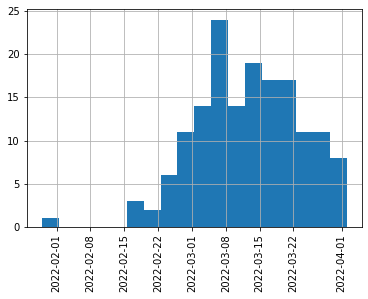

In [10]:
#plot time
nbins = (datetime.datetime.strptime(lastDay, '%Y-%m-%d') - datetime.datetime.strptime(firstDay, '%Y-%m-%d')).days
nbins = int(nbins / 5) #integer is number of days per bin
pd.to_datetime(df[df.KeywordsInArticle].Date).dt.date.hist(bins=nbins)
plt.xticks(rotation=90)

In [14]:
df[df.KeywordsInArticle].sort_values(by='Date')

,ID,Title,url,Date,KeywordsInArticle
923,news-874761,"Crisi Ucraina, gli scenari possibili dell’inva...",https://www.open.online/2022/01/29/ucraina-rus...,2022-01-29 10:23:00,True
878,news-896337,"Crisi ucraina, Kiev accusa Mosca: «Non ha riti...",https://www.open.online/2022/02/16/crisi-ucrai...,2022-02-16 17:15:00,True
873,news-897855,"L’asilo colpito dall’artiglieria in Ucraina, p...",https://www.open.online/2022/02/17/crisi-ucrai...,2022-02-17 16:08:00,True
867,news-899845,"Crisi ucraina, donne e bambini in fuga dalle r...",https://www.open.online/2022/02/18/crisi-ucrai...,2022-02-18 22:47:00,True
859,news-900011,"Crisi Ucraina, Germania e Francia ai connazion...",https://www.open.online/2022/02/19/crisi-ucrai...,2022-02-19 21:30:00,True
...,...,...,...,...,...
34,news-943845,No! Questa donna non è la blogger incinta evac...,https://www.open.online/2022/03/31/ucraina-mar...,2022-03-31 15:15:00,True
27,news-940911,"Ucraina, Draghi sente Scholz su gas e sanzioni...",https://www.open.online/2022/03/31/guerra-ucra...,2022-03-31 23:00:00,True
14,news-945085,"Fedorov, il ministro di Kiev che guida il fron...",https://www.open.online/2022/04/01/guerra-ucra...,2022-04-01 16:32:00,True
5,news-945939,La moglie di Zelensky: «Viviamo nell’incubo de...,https://www.open.online/2022/04/02/ucraina-ole...,2022-04-02 06:38:00,True
